<a href="https://colab.research.google.com/github/pawar8787/homebrew-mit/blob/master/Heart_Disease_Diagnostic_Analysis_Project_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#READING DATA
data=pd.read_csv("Heart Disease data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#PRINTING INFORMATION OF THE DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#DESCRIPTION OF DATAFRAME
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#CHECKING IF THERE ARE ANY NULL VALUES
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Figure size 576x576 with 0 Axes>

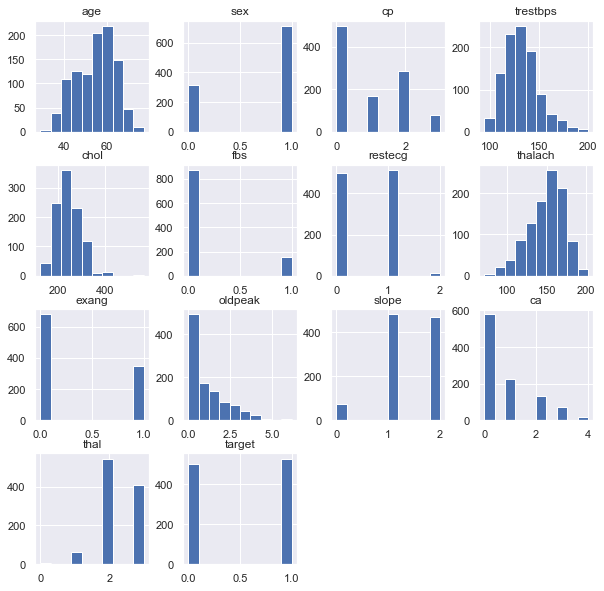

<Figure size 576x576 with 0 Axes>

In [ ]:
#MULTIPLE HISTOGRAMS
data.hist()
plt.figure(figsize=(8,8))

In [ ]:
target=data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [ ]:
def heart_disease(series):
    if series==0:
        return 'Absent'
    elif series==1:
        return 'Present'

In [ ]:
data['Heart_Disease']=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent


In [ ]:
HD=data.groupby('Heart_Disease')['target'].count()
HD

Heart_Disease
Absent     499
Present    526
Name: target, dtype: int64

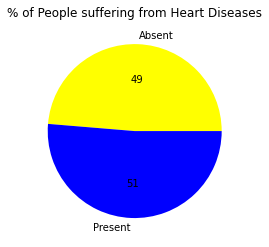

In [ ]:
#PIE CHART
plt.pie(HD,labels=['Absent','Present'],colors=['yellow','blue'],autopct='%0.00f')
plt.title('% of People suffering from Heart Diseases')
plt.show()

In [ ]:
#MEAN AGE FOR HEART DISEASES
mm=data[(data.target ==  1) & (data.sex == 1)].age.mean()
fm=data[(data.target ==  1) & (data.sex == 0)].age.mean()
print('Average Age of Male with a Heart Disease : ',mm)
print('Average Age of Female with a Heart Disease : ',fm)

Average Age of Male with a Heart Disease :  50.736666666666665
Average Age of Female with a Heart Disease :  54.6283185840708


In [ ]:
#MINIMUM AGE FOR HEART DISEASES
min_m=data[(data.target ==  1) & (data.sex == 1)].age.min()
min_f=data[(data.target ==  1) & (data.sex == 0)].age.min()
print('Minimum Age of a Female with Heart Disease :',min_f)
print('Minimum Age of a Male with Heart Disease :',min_m)

Minimum Age of a Female with Heart Disease : 34
Minimum Age of a Male with Heart Disease : 29


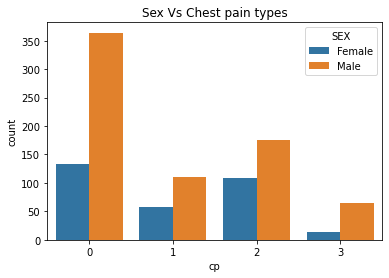

In [ ]:
#GRAPH BETN CHESTPAIN AND SEX.THERE ARE 4 TYPES OF CHEST PAIN 
CP=sns.countplot(x="cp", data=data ,hue = 'sex').set_title("Sex Vs Chest pain types")
plt.legend(title='SEX', loc='upper right', labels=['Female', 'Male'])
plt.show(CP)

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Cholestrol (mg/dl)'),
 Text(0.5, 1.0, 'Distribution of Cholestrol levels by Age')]

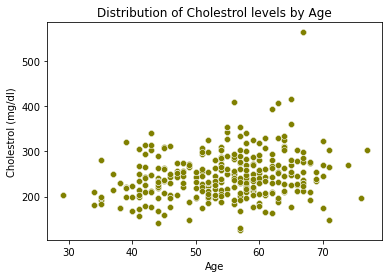

In [ ]:
#SCATTERPLOT
st=sns.scatterplot(x='age',y='chol',data=data,color='olive')
st.set(xlabel='Age',ylabel='Cholestrol (mg/dl)',title='Distribution of Cholestrol levels by Age')

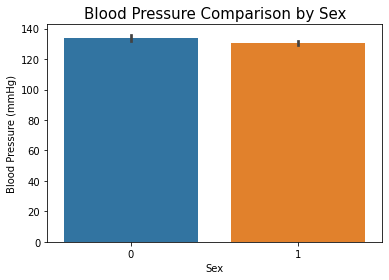

In [ ]:
#BARPLOT
sns.barplot(x='sex',y='trestbps',data=data)
plt.title("Blood Pressure Comparison by Sex",fontsize=15)
plt.xlabel('Sex')
plt.ylabel("Blood Pressure (mmHg)")
plt.show()

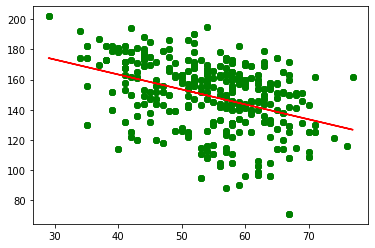

In [ ]:
#LINEAR REGRESSION
from scipy import stats

x = data.age
y = data.thalach

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y,color="green")
plt.plot(x, mymodel,color="red")
plt.show()

In [ ]:
#MULTIPLE REGRESSION
x = data[['age', 'sex', 'thal']]
y = data['restecg']

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
predicted_restecg = regr.predict([[42,1,0,138,203,1,2,168,0,3.1,2,2,3]])

In [ ]:
print(predicted_restecg)

[2.]


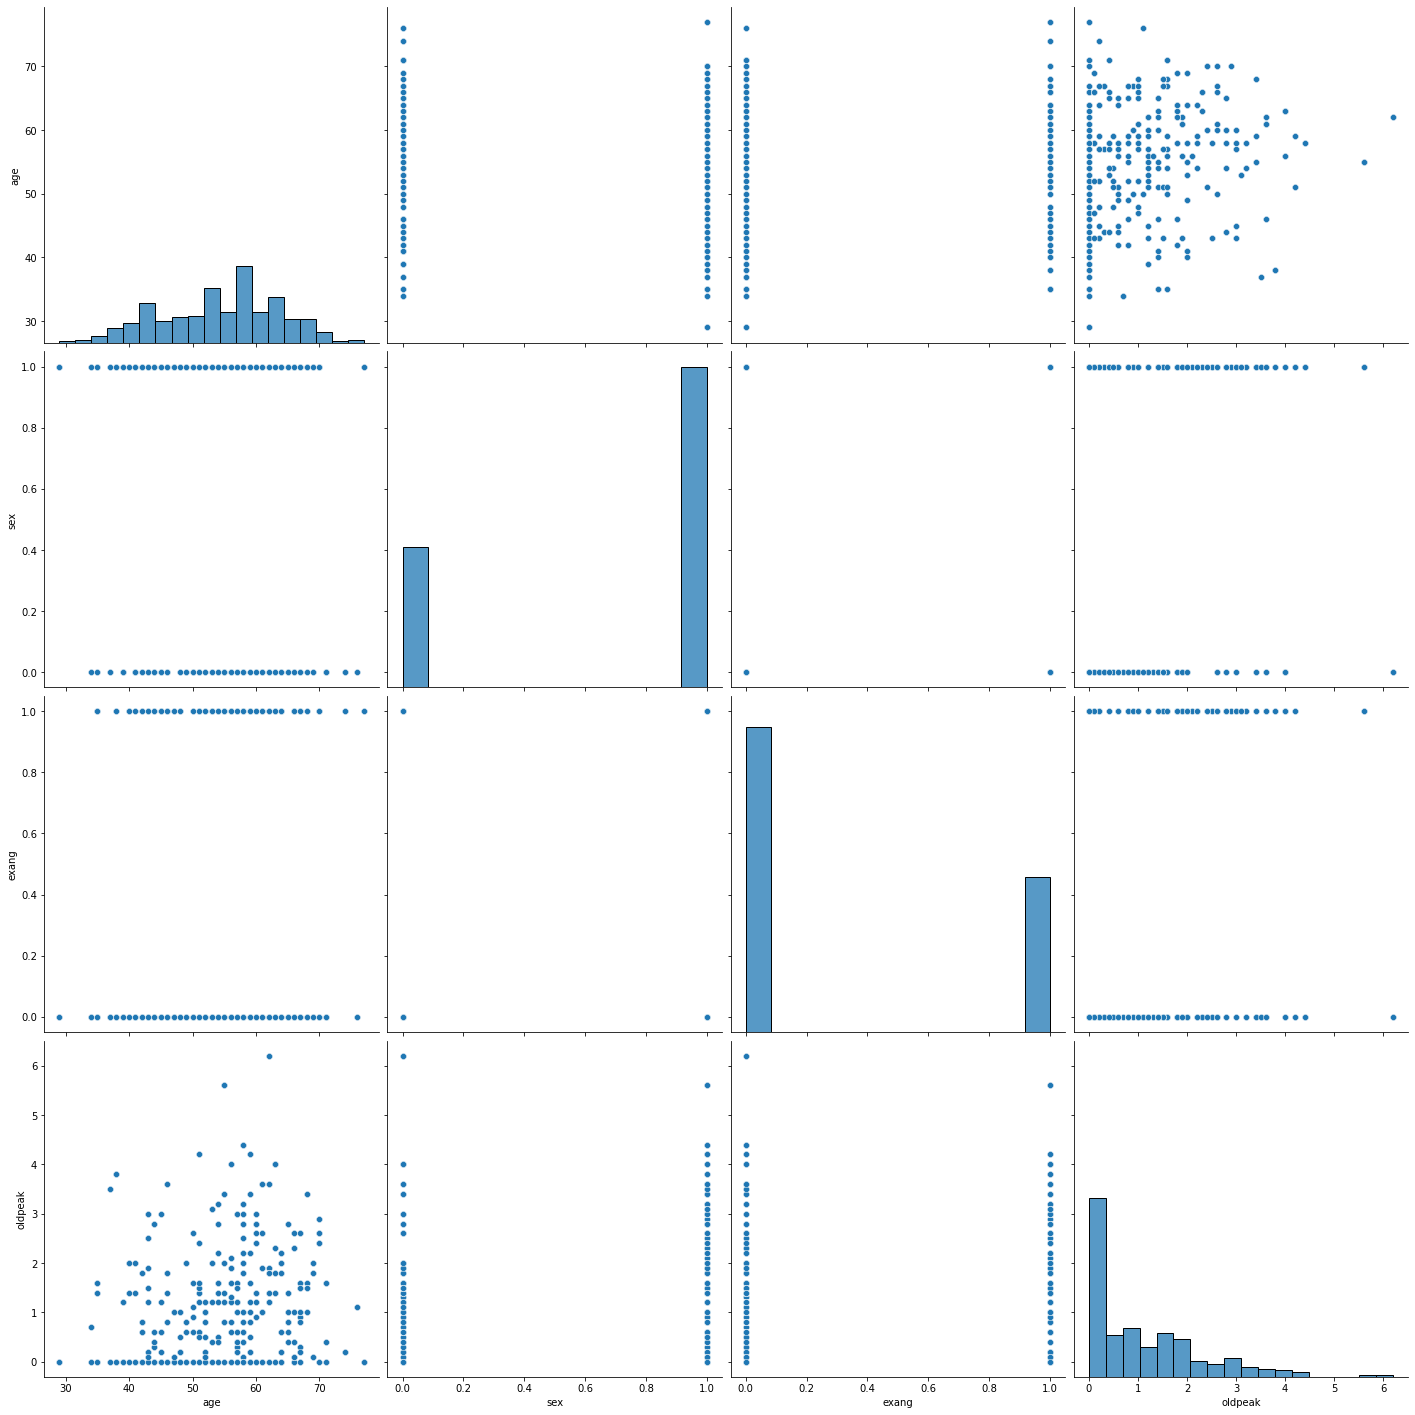

In [ ]:
#MULTIPLE GRAPHS
x=data[['age','sex','exang','oldpeak']]
sns.pairplot(data = x, height = 5) 

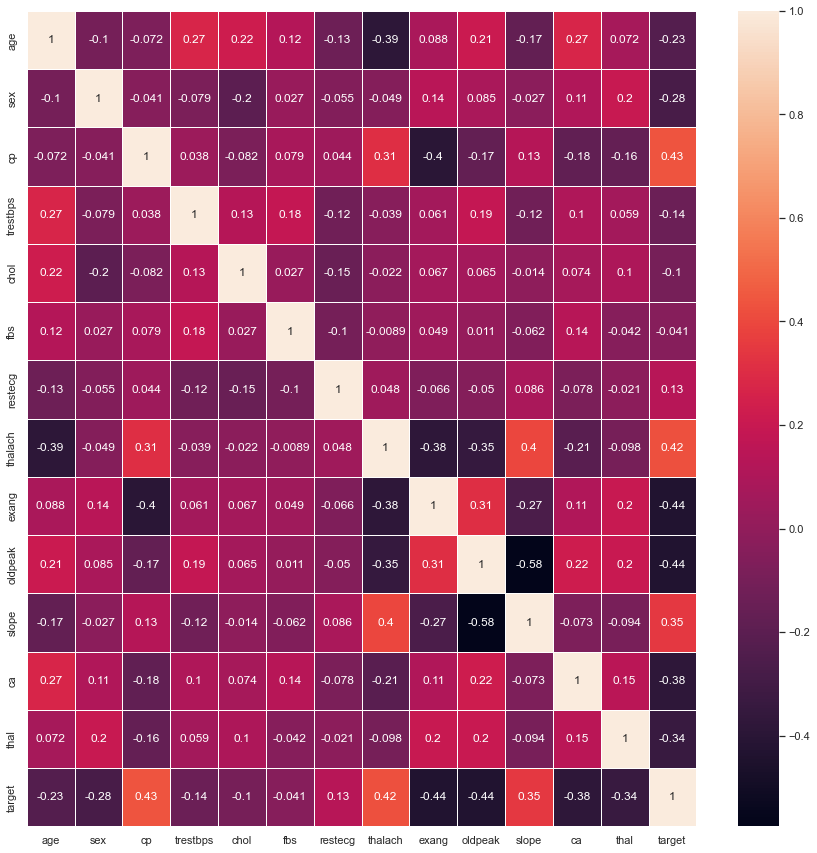

In [ ]:
#CORELATION HEATMAP
dataplot = sns.heatmap(data.corr(), annot=True,linewidths=.5)
sns.set (rc = {'figure.figsize':(10, 10)})